In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from tableone import TableOne
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# Load data

In [3]:
DF = pd.read_csv("03_full_dataset_clean.csv")

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733322 entries, 0 to 733321
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   zone       733322 non-null  object 
 1   wban       733322 non-null  int64  
 2   dt         733322 non-null  object 
 3   mw         733322 non-null  float64
 4   year       733322 non-null  int64  
 5   date       733322 non-null  object 
 6   hour       733322 non-null  int64  
 7   month      733322 non-null  int64  
 8   dow        733322 non-null  object 
 9   weekend    733322 non-null  bool   
 10  holiday    733322 non-null  bool   
 11  is_dst     733322 non-null  bool   
 12  is_sah     733322 non-null  bool   
 13  precovid   733322 non-null  bool   
 14  postcovid  733322 non-null  bool   
 15  temp       733322 non-null  float64
 16  precip     733322 non-null  float64
 17  rh         732998 non-null  float64
 18  pressure   728920 non-null  float64
 19  windspeed  732386 non-n

There are missing values in 'rh', 'pressure', 'windspeed'.

In [28]:
DF.groupby("zone").test.agg(lambda x: sum(x==1)/sum(x==0))

zone
AE      0.111245
AEP     0.111047
AP      0.111238
ATSI    0.111118
BC      0.111171
CE      0.111206
DAY     0.111178
DEOK    0.111192
DOM     0.111199
DPL     0.111828
DUQ     0.111182
EKPC    0.111122
JC      0.111455
ME      0.111203
OVEC    0.116552
PE      0.111185
PEP     0.111770
PL      0.111439
PN      0.111320
PS      0.111182
RECO    0.111143
Name: test, dtype: float64

## Summary by zones

In [10]:
cols = ["temp", "precip", "rh", "pressure", "windspeed", "mw", "is_dst", "rain", "snow"]
catg = ["is_dst", "rain", "snow"]
table_zone = TableOne(DF, cols, catg, groupby="zone")
table_zone

Grouped by zone                                                                                                                                                                                                                                                                                                                                                                     
                                   Missing          Overall              AE               AEP              AP             ATSI              BC                CE             DAY            DEOK               DOM             DPL             DUQ            EKPC              JC              ME          OVEC              PE             PEP              PL              PN               PS          RECO
n                                                    733322           35072             34918           35004            35018           35043             35043           35031           35047             35045           34818           35030           34987           34813           35054         33587           35039           34854           34987           34951            35040         34941
temp, mean (SD)                          0      55.6 (18.5)     56.9 (17.6)       56.9 (17.8)     52.4 (18.1)      53.0 (18.9)     58.4 (18.1)       51.8 (20.6)     54.6 (19.3)     55.8 (18.6)       60.3 (17.3)     56.8 (17.8)     52.7 (18.7)     56.7 (18.2)     55.6 (18.1)     55.9 (18.3)   54.8 (19.3)     57.8 (17.8)     59.9 (17.2)     52.3 (18.7)     52.3 (18.4)      57.0 (18.3)   55.8 (18.5)
precip, mean (SD)                        0        0.0 (0.0)       0.0 (0.0)         0.0 (0.0)       0.0 (0.0)        0.0 (0.0)       0.0 (0.0)         0.0 (0.0)       0.0 (0.0)       0.0 (0.0)         0.0 (0.0)       0.0 (0.0)       0.0 (0.0)       0.0 (0.0)       0.0 (0.0)       0.0 (0.0)     0.0 (0.0)       0.0 (0.0)       0.0 (0.0)       0.0 (0.0)       0.0 (0.0)        0.0 (0.0)     0.0 (0.0)
rh, mean (SD)                          324      67.2 (18.8)     70.7 (19.5)       70.4 (19.4)     70.3 (18.8)      68.5 (16.2)     65.1 (19.9)       67.4 (16.8)     68.0 (16.9)     68.8 (17.6)       69.4 (20.5)     67.4 (19.3)     69.8 (18.9)     70.0 (17.6)     64.3 (18.9)     64.6 (17.9)   69.4 (18.3)     63.2 (19.7)     63.4 (18.5)     67.5 (19.4)     67.3 (14.8)      61.8 (20.3)   63.1 (20.8)
pressure, mean (SD)                   4402       29.5 (0.6)      30.0 (0.2)        29.2 (0.2)      28.0 (0.2)       29.2 (0.2)      29.9 (0.2)        29.3 (0.2)      29.0 (0.2)      29.1 (0.2)        29.9 (0.2)      30.0 (0.2)      28.8 (0.2)      29.0 (0.2)      30.0 (0.2)      29.7 (0.2)    29.2 (0.2)      30.0 (0.2)      30.0 (0.2)      29.5 (0.2)      29.2 (0.2)       30.0 (0.2)    29.8 (0.2)
windspeed, mean (SD)                   936        7.7 (7.4)       8.4 (5.7)         5.2 (3.8)       4.3 (4.8)        9.4 (5.3)       6.6 (5.1)         9.5 (5.1)       9.5 (5.3)      8.4 (12.8)         7.4 (4.9)       8.3 (5.4)       7.2 (5.0)       7.8 (4.6)       7.2 (5.0)       6.8 (5.7)     7.7 (5.1)       8.9 (5.3)       8.4 (4.9)      6.0 (13.0)       9.4 (5.3)        9.5 (5.4)    4.9 (17.5)
mw, mean (SD)                            0  4253.4 (3981.4)  1140.5 (340.7)  14515.6 (2337.4)  5611.1 (971.1)  7487.0 (1289.8)  3546.6 (786.9)  10861.7 (2180.1)  1972.0 (378.3)  3028.4 (591.4)  12015.5 (2449.6)  2125.4 (516.4)  1510.8 (285.6)  1489.9 (355.9)  2539.7 (723.3)  1796.8 (334.7)   38.9 (11.3)  4469.0 (948.4)  3260.2 (717.3)  4703.3 (845.5)  1973.5 (300.1)  4887.4 (1094.2)  163.0 (47.8)
is_dst, n (%)        False               0    256554 (35.0)    12258 (35.0)      12225 (35.0)    12229 (34.9)     12261 (35.0)    12262 (35.0)      12260 (35.0)    12260 (35.0)    12263 (35.0)      12263 (35.0)    12254 (35.2)    12260 (35.0)    12261 (35.0)    12114 (34.8)    12261 (35.0)  11618 (34.6)    12257 (35.0)    12263 (35.2)    12259 (35.0)    12224 (35.0)     12265 (35.0)  12237 (35.0)
                     True  

## MW load vs. temperature in zone AE

In [11]:
df = DF[DF.zone=="AE"]

Text(0, 0.5, 'load')

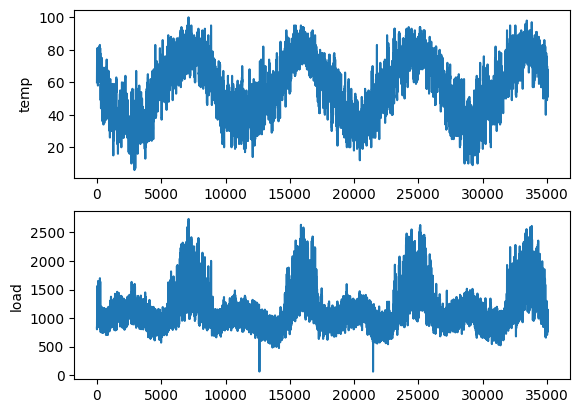

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1)
df['temp'].plot(ax=axes[0])
axes[0].set_ylabel("temp")
df['mw'].plot(ax=axes[1])
axes[1].set_ylabel('load')

It shows clear yearly seasonality.

<AxesSubplot: xlabel='temp', ylabel='mw'>

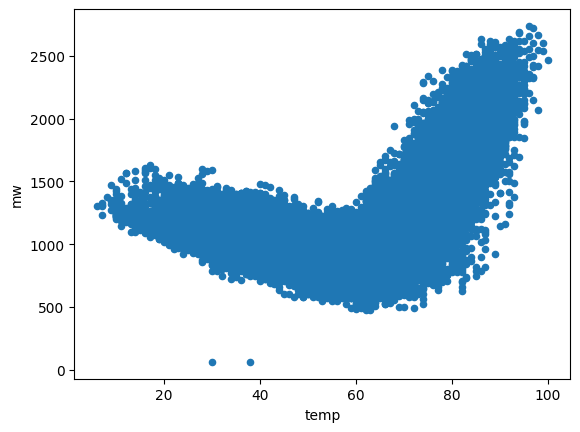

In [13]:
df.plot.scatter("temp", "mw")

Load is highly correlated with high temperature and negatively correlated with low temperature.

* One year data: 2021-01-01 to 2022-01-01

/var/folders/pv/qm6yts0j7hdgggvq53hrzfr0vfyhvv/T/ipykernel_36565/2180408576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


Text(0, 0.5, 'load')

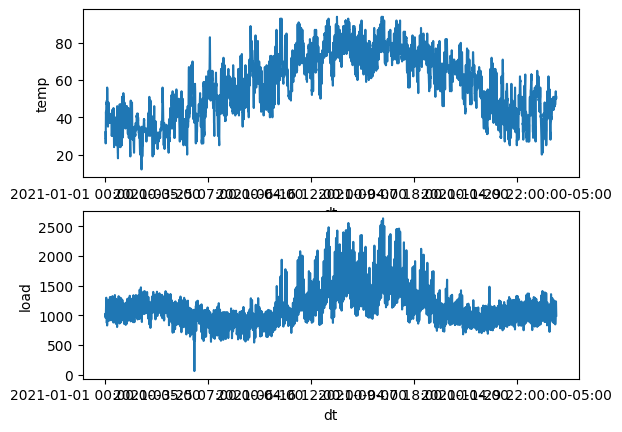

In [20]:
df["date"] = pd.to_datetime(df["date"])
df1 = df.loc[(df["date"] >= datetime(2021, 1, 1)) & (df["date"] < datetime(2022, 1, 1))]
df1 = df1.set_index("dt")

fig, axes = plt.subplots(nrows=2, ncols=1)
df1['temp'].plot(ax=axes[0])
axes[0].set_ylabel("temp")
df1['mw'].plot(ax=axes[1])
axes[1].set_ylabel('load')

array([<AxesSubplot: title={'center': 'temp'}, xlabel='month'>,
       <AxesSubplot: title={'center': 'mw'}, xlabel='month'>],
      dtype=object)

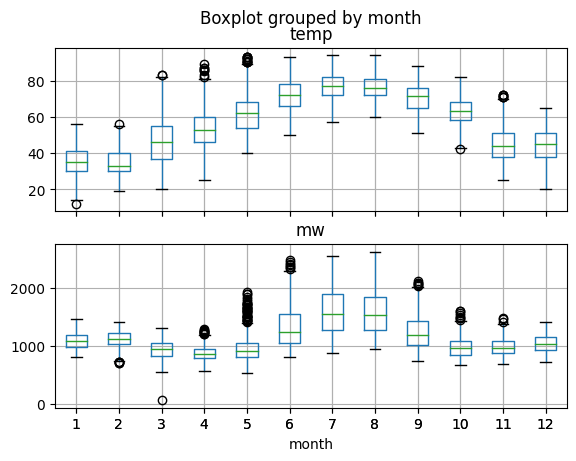

In [21]:
df1.boxplot(['temp', 'mw'], by = "month", layout = (2,1), sharey=False)

More energy consumed in summer than winter.

## Daily Seasonal decompose

Data from 2022/09/01 to 2022/10/01.

/var/folders/pv/qm6yts0j7hdgggvq53hrzfr0vfyhvv/T/ipykernel_36565/1731700509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


Text(0, 0.5, 'load')

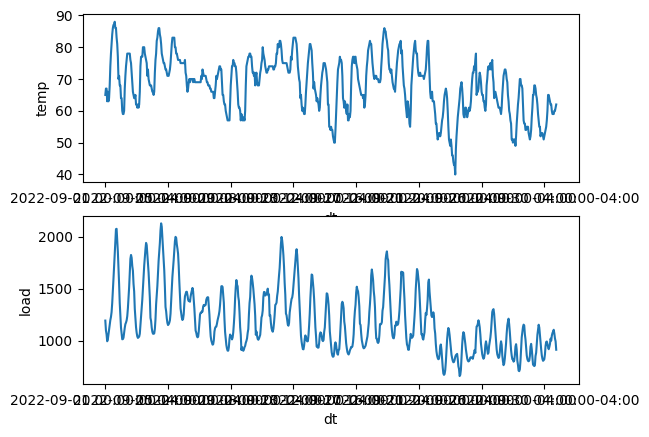

In [25]:
df["date"] = pd.to_datetime(df["date"])
df_m1 = df.loc[(df["date"] >= datetime(2022, 9, 1)) & (df["date"] < datetime(2022, 10, 1))]
df_m1 = df_m1.set_index("dt")

fig, axes = plt.subplots(nrows=2, ncols=1)
df_m1['temp'].plot(ax=axes[0])
axes[0].set_ylabel("temp")
df_m1['mw'].plot(ax=axes[1])
axes[1].set_ylabel('load')

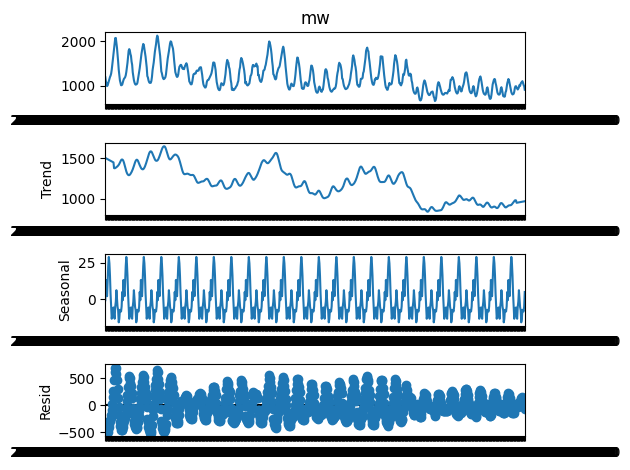

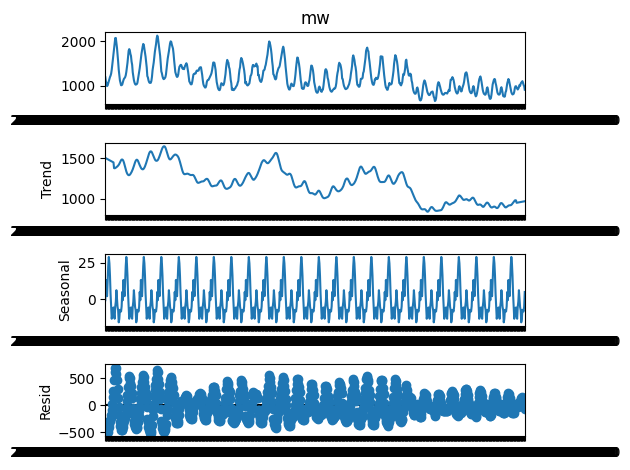

In [30]:
res = seasonal_decompose(x=df_m1["mw"], model='additive', extrapolate_trend='freq', period=30)
res.plot()